In [1]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# 데이터 셋을 만듭니다.
X, y = mglearn.datasets.make_forge()

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

X.shape: (26, 2)


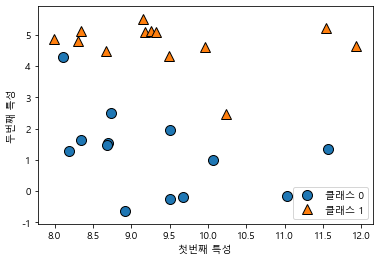

In [4]:
#산점도를 그립니다.
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(['클래스 0', '클래스 1'], loc =4)
plt.xlabel('첫번째 특성')
plt.ylabel('두번째 특성')
print('X.shape:', X.shape);

Text(0, 0.5, '타깃')

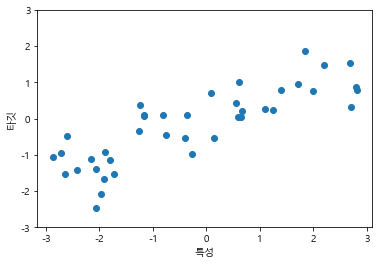

In [5]:
X,y = mglearn.datasets.make_wave(n_samples =40)
plt.plot(X,y, 'o')
plt.ylim(-3,3)
plt.xlabel('특성')
plt.ylabel('타깃')

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
print('cancer.kyes():\n', cancer.keys())

cancer.kyes():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print('유방암 데이터의 형태', cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [10]:
print('클래스별 샘플 개수:\n',
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

클래스별 샘플 개수:
 {'malignant': 212, 'benign': 357}


In [11]:
print('특성 이름:\n', cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
from sklearn.datasets import load_boston
boston = load_boston()
print('데이터의 형태:', boston.data.shape)

데이터의 형태: (506, 13)


In [13]:
X,y = mglearn.datasets.load_extended_boston()
print('X.shape:', X.shape)

X.shape: (506, 104)


### 2.3.2 k-최근접 이웃

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


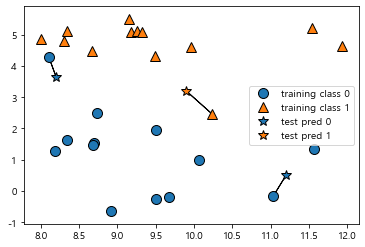

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors =1)

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


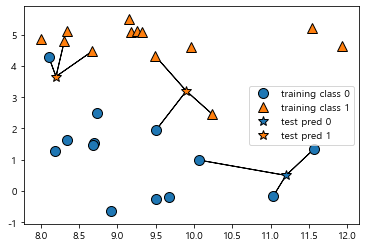

In [15]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X,y = mglearn.datasets.make_forge()

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
clf = KNeighborsClassifier(n_neighbors=3)

In [21]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [22]:
print('테스트 세트 예측:', clf.predict(X_test))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [23]:
print('테스트 세트 정확도:{:.2f}'. format(clf.score(X_test, y_test)))

테스트 세트 정확도:0.86


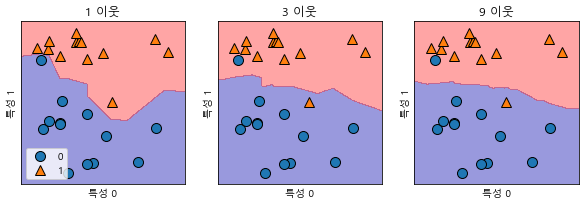

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

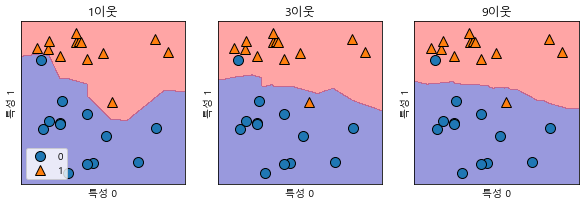

In [25]:
fig, axes = plt.subplots(1,3, figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    #fit 메소드는 self 오브젝트를 리턴합니다.
    #그래서 객체 생성과 fit메소드를 한 줄에 쓸 수 있습니다.
    clf =KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
cancer = load_breast_cancer()

In [28]:
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state =66) 

In [29]:
training_accuracy=[]
test_accuracy=[]

In [30]:
#1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

In [31]:
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #훈련세트 정확도 저장
    training_accuracy.append(clf.score(X_train,y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))

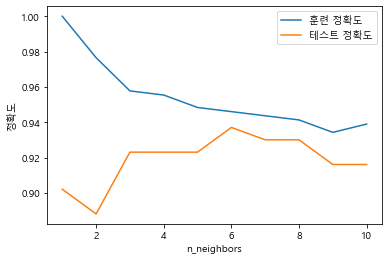

In [32]:
plt.plot(neighbors_settings, training_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel('정확도')
plt.xlabel('n_neighbors')
plt.legend()

### k-최근접 이웃 회귀

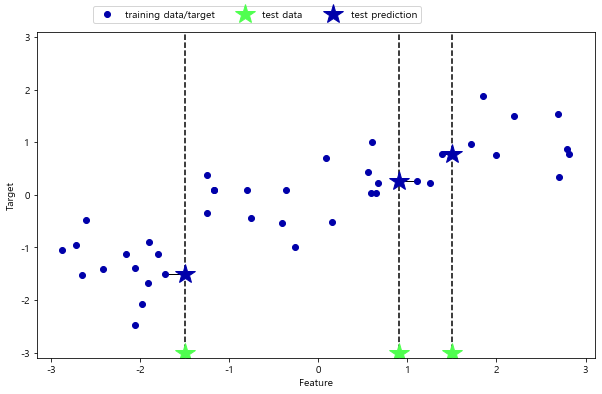

In [33]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

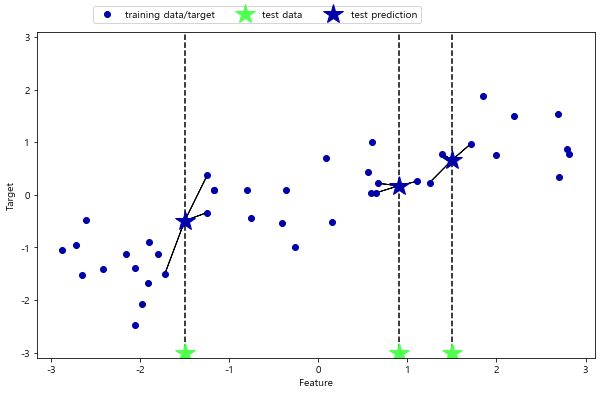

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
X,y= mglearn.datasets.make_wave(n_samples=40)

In [37]:
#wave 데이터셋을 훈련 세트와 데이터 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
X_train.shape, X_test.shape

((30, 1), (10, 1))

In [39]:
# 이웃 수를 3으로 하여 모델의 객체를 만든다.
reg = KNeighborsRegressor(n_neighbors =3)

In [40]:
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킨다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [41]:
print('테스트 세트 예측:\n', reg.predict(X_test))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [42]:
print('테스트 세트 R^2: {:.2f}'.format(reg.score(X_test,y_test)))

테스트 세트 R^2: 0.83


### KNeighborsRegressor 분석

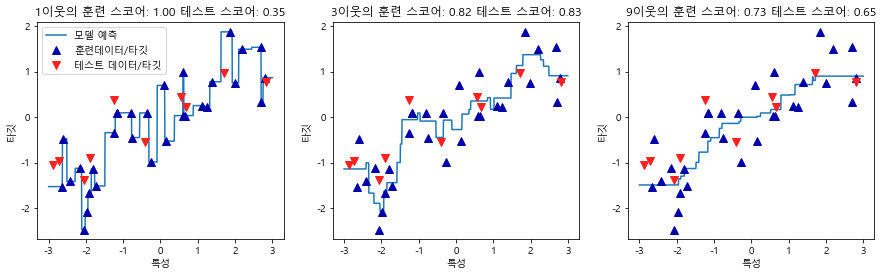

In [43]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# -3과 3사이에 1,000 개의 데이터 포인트를 만듭니다.
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    # 1,3,9 이웃을 사용한 예측을 합니다.
    reg=KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize= 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize =8)
    
    ax.set_title(
    '{}이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}'.format(
    n_neighbors, reg.score(X_train, y_train), reg.score(X_test,y_test)))
    ax.set_xlabel('특성')
    ax.set_ylabel('타깃')
axes[0].legend(['모델 예측', '훈련데이터/타깃', '테스트 데이터/타깃'], loc='best')

### 2.3.3 선형모델

w[0]: 0.393906  b: -0.031804


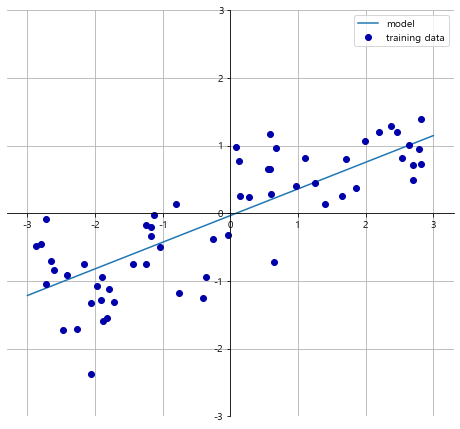

In [44]:
mglearn.plots.plot_linear_regression_wave()

### 선형 회귀(최소제곱법)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =42)

lr = LinearRegression().fit(X_train,y_train)

In [47]:
print('lr.coef_:', lr.coef_)
print('lr.intercept_:', lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [48]:
print('훈련 세트 점수:{:.2f}'.format(lr.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lr.score(X_test,y_test)))

훈련 세트 점수:0.67
테스트 세트 점수:0.66


In [49]:
X, y = mglearn.datasets.load_extended_boston()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [51]:
print('훈련 세트 점수:{:.2f}'.format(lr.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'. format(lr.score(X_test, y_test)))

훈련 세트 점수:0.95
테스트 세트 점수:0.61


### 리지 회귀

In [52]:
from sklearn.linear_model import Ridge

In [53]:
ridge = Ridge().fit(X_train,y_train)

In [54]:
print('훈련 세트 점수:{:.2f}'.format(ridge.score(X_train, y_train)))

훈련 세트 점수:0.89


In [55]:
print('테스트 세트 점수:{:.2f}'.format(ridge.score(X_test,y_test)))

테스트 세트 점수:0.75


In [56]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

In [57]:
print('훈련 세트 점수:{:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'.format(ridge.score(X_test, y_test)))

훈련 세트 점수:0.89
테스트 세트 점수:0.75


In [58]:
ridge01=Ridge(alpha=0.1).fit(X_train, y_train)
print('훈련 세트 점수:{:.2f}'.format(ridge.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'.format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.89
테스트 세트 점수:0.75


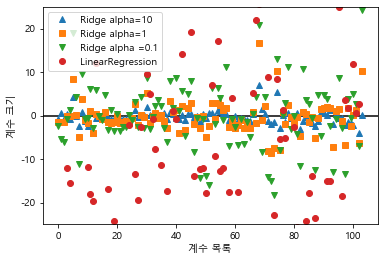

In [59]:
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label = 'Ridge alpha =0.1')

plt.plot(lr.coef_,'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

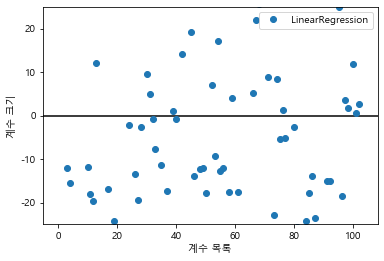

In [60]:
plt.plot(lr.coef_,'o', label='LinearRegression')
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

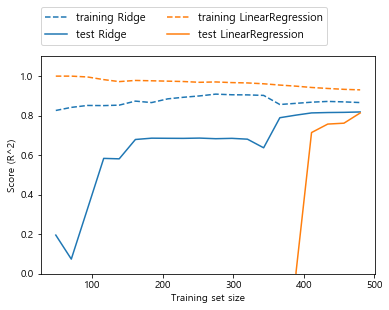

In [61]:
mglearn.plots.plot_ridge_n_samples()

### 라소

In [62]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('훈련 세트 점수:{:.2f}'.format(lasso.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'.format(lasso.score(X_test, y_test)))
print('사용한 특성의 개수:', np.sum(lasso.coef_ !=0))

훈련 세트 점수:0.29
테스트 세트 점수:0.21
사용한 특성의 개수: 4


In [63]:
# 'max_iter' 기본 값을 증가시키지 않으면 max_iter 값을 늘이라는 경고가 발생한다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print('훈련 세트 점수:{:.2f}'.format(lasso001.score(X_train,y_train)))
print('테스트 세트 점수:{:.2f}'.format(lasso001.score(X_test,y_test)))
print('사용한 특성의 개수:', np.sum(lasso001.coef_ !=0))

훈련 세트 점수:0.90
테스트 세트 점수:0.77
사용한 특성의 개수: 33


In [64]:
lasso00001 = Lasso(alpha =0.0001, max_iter = 100000).fit(X_train,y_train)

In [65]:
print('훈련 세트 점수:{:.2f}'.format(lasso00001.score(X_train, y_train)))
print('테스트 세트 점수:{:.2f}'.format(lasso00001.score(X_test,y_test)))
print('사용한 특성의 개수:', np.sum(lasso00001.coef_ !=0))

훈련 세트 점수:0.95
테스트 세트 점수:0.64
사용한 특성의 개수: 96


Text(0, 0.5, '계수 크기')

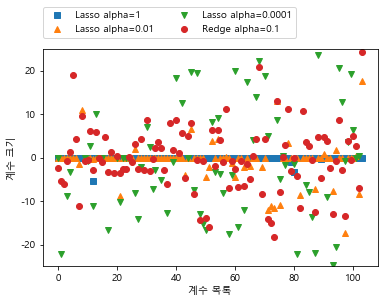

In [66]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Redge alpha=0.1')
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')

### 분류용 선형 모델

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [68]:
X, y = mglearn.datasets.make_forge()

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


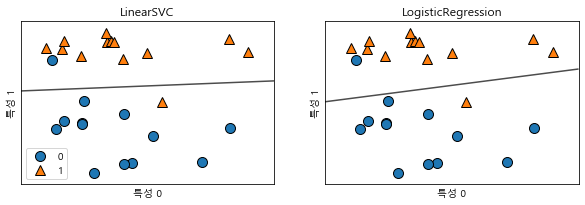

In [69]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps =0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend()

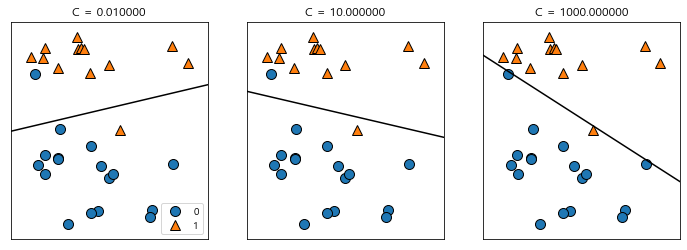

In [70]:
mglearn.plots.plot_linear_svc_regularization()

In [71]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('훈련 세트 점수:{:.3f}'.format(logreg.score(X_train, y_train)))
print('데스트 세트 점수:{:.3f}'.format(logreg.score(X_test, y_test)))

훈련 세트 점수:0.955
데스트 세트 점수:0.958


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [72]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('훈련 세트 점수:{:.3f}'.format(logreg100.score(X_train,y_train)))
print('테스트 세트 점수:{:.3f}'.format(logreg100.score(X_test,y_test)))

훈련 세트 점수:0.972
테스트 세트 점수:0.965


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print('훈련 세트 점수:{:.3f}'.format(logreg001.score(X_train,y_train)))
print('테스트 세트 점수:{:.3f}'.format(logreg001.score(X_test,y_test)))

훈련 세트 점수:0.934
테스트 세트 점수:0.930


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


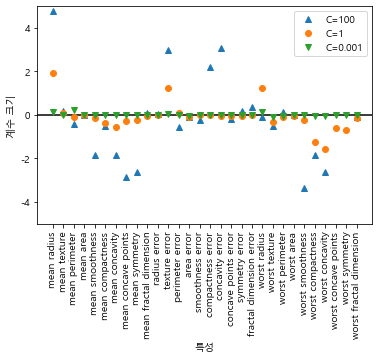

In [74]:
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg001.coef_.T, 'v', label = 'C=0.001')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel('특성')
plt.ylabel('계수 크기')
plt.legend()

C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


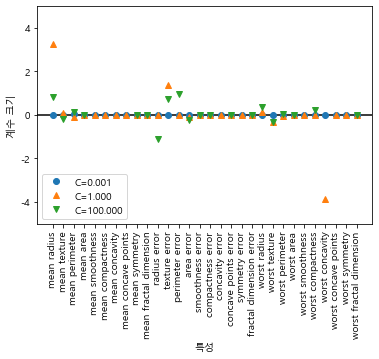

In [75]:
for C, marker in zip([0.001,1,100], ['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train,y_train)
    print('C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}'.format(C, lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation =90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel('특성')
plt.ylabel('계수 크기')

plt.ylim(-5, 5)
plt.legend(loc=3)

### 다중 클래스 분류용 선형 모델

In [76]:
from sklearn.datasets import make_blobs

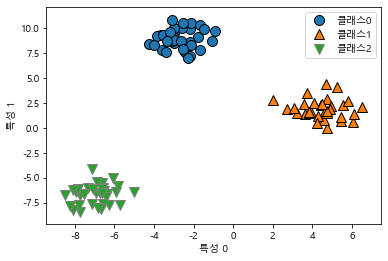

In [77]:
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.legend(['클래스0', '클래스1', '클래스2'])

In [78]:
linear_svm = LinearSVC().fit(X,y)
print('계수 배열의 크기:', linear_svm.coef_.shape)
print('절편 배열의 크기:', linear_svm.intercept_.shape)

계수 배열의 크기: (3, 2)
절편 배열의 크기: (3,)


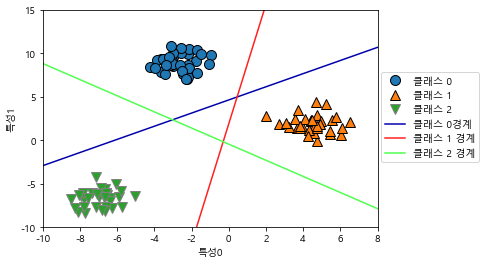

In [79]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line *coef[0]+intercept)/ coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0경계', '클래스 1 경계', '클래스 2 경계'], loc= (1.01,0.3))

Text(0, 0.5, '특성1')

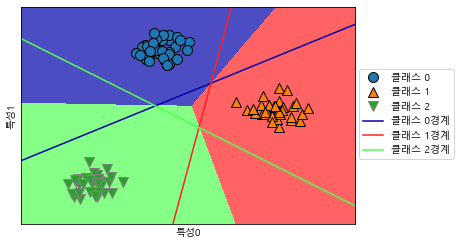

In [80]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line=np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/ coef[1], c=color)
    
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0경계', '클래스 1경계', '클래스 2경계'], loc=(1.01, 0.3))
plt.xlabel('특성0')
plt.ylabel('특성1')

### 2.3.4 나이브 베이즈 분류기

In [81]:
X = np.array([[0,1,0,1],
             [1,0,1,1],
             [0,0,0,1],
             [1,0,1,0]])
y= np.array([0,1,0,1])

In [82]:
counts={}
for label in np.unique(y):
    #각 클래스에 대해 반복
    #특성마다 1이 나타난 횟수를 센사.
    counts[label] = X[y==label].sum(axis =0)
print('특성 카운트:\n', counts)

특성 카운트:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 2.3.5 결정 트리

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify =cancer.target, random_state = 42)
tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [85]:
print('훈련 세트 정확도: {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [86]:
tree = DecisionTreeClassifier(max_depth =4, random_state =0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [87]:
print('훈련 세트 정확도:{:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도"{:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도"0.951


In [88]:
import graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:/program Files (x86)/Graphviz2.38/bin'

In [89]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [90]:
#export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True)

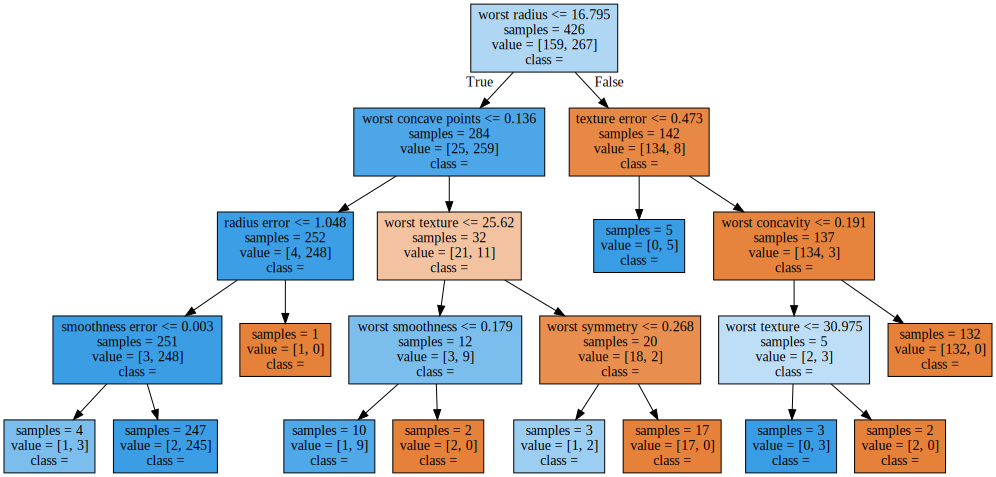

In [91]:
import graphviz

with open("tree.dot", encoding = 'UTF-8') as f:
    dot_graph = f.read()
    #dot= graphviz.Source(dot_graph); dot.format='png'; dot.render(filename ='tree.png')
    
display(graphviz.Source(dot_graph))

In [92]:
print('특성 중요도:\n', tree.feature_importances_)

특성 중요도:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


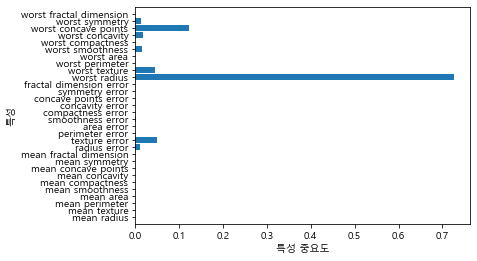

In [93]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align ='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


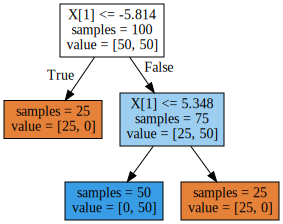

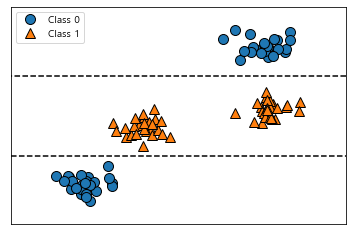

In [94]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, '가격($/Mbyte)')

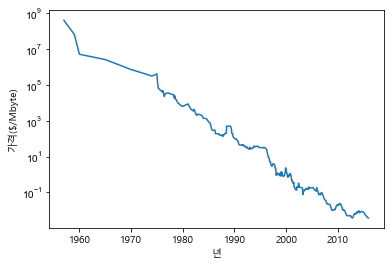

In [95]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격($/Mbyte)')

In [96]:
ram_prices[0:5]

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


In [97]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다.
data_train = ram_prices[ram_prices.date <2000]
data_test = ram_prices[ram_prices.date >=2000]

#가격 예측을 위해 날짜 특성만을 이용합니다.
X_train = data_train.date[:,np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다.
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#예측은 전체 기간에 대해서 수행합니다.
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측한 값의 로그 스케일을 되돌립니다.
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


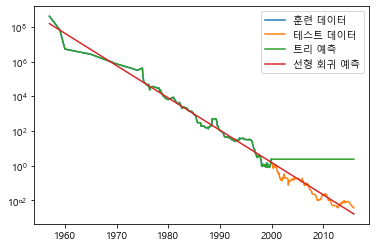

In [98]:
plt.semilogy(data_train.date, data_train.price, label ='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label = '테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label = '트리 예측')
plt.semilogy(ram_prices.date, price_lr, label = '선형 회귀 예측')
plt.legend()

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [100]:
X, y = make_moons(n_samples =100, noise =0.25, random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state =42)

forest = RandomForestClassifier(n_estimators =5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

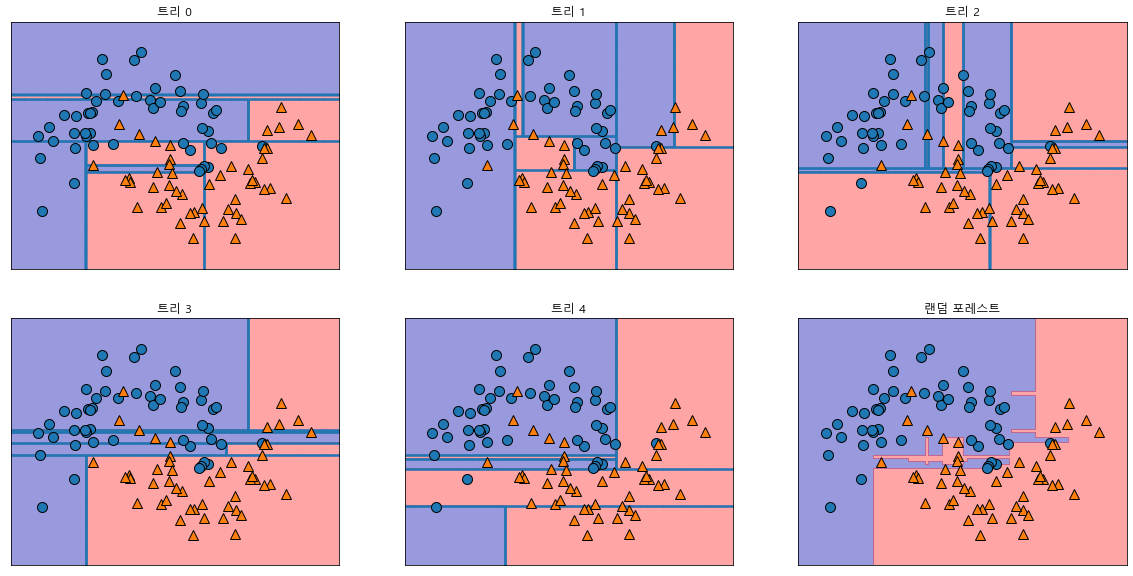

In [101]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha =.4)
axes[-1,-1].set_title('랜덤 포레스트')
mglearn.discrete_scatter(X[:,0], X[:,1], y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators = 100, random_state =0)
forest.fit(X_train, y_train)

print('훈련 세트 정확도: {:.3f}'.format(forest.score(X_train, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도:0.972


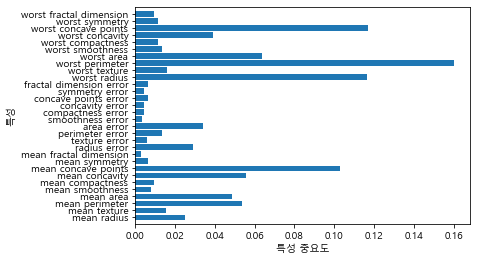

In [103]:
plot_feature_importances_cancer(forest)

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state =0)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도:{:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.965


In [106]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도:{:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(gbrt.score(X_test, y_test)))

훈련 세트 정확도:0.991
테스트 세트 정확도:0.972


In [107]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.01)
gbrt.fit(X_train, y_train)

print('훈련 세트 정확도:{:.3f}'.format(gbrt.score(X_train, y_train)))
print('테스트 세트 정확도:{:.3f}'.format(gbrt.score(X_test,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.965


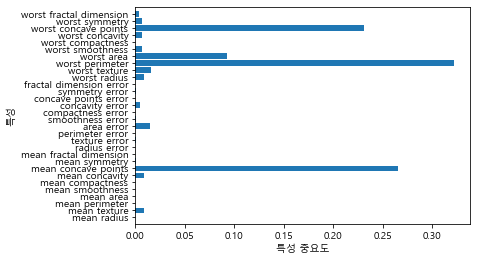

In [108]:
gbrt = GradientBoostingClassifier(random_state =0, max_depth =1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

In [110]:
Xm,ym = make_moons(n_samples =100, noise = 0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify=ym, random_state = 0)

In [111]:
cancer = load_breast_cancer()
d= cancer.data
t= cancer.target
Xc_train, Xc_test, yc_train, yc_test = train_test_split(d, t, random_state =0)

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators = 100, oob_score=True, n_jobs = -1, random_state =42)
bagging.fit(Xc_train, yc_train)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=-1, oob_score=True,
                  random_state=42, verb

In [113]:
print('훈련 세트 정확도:{:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('데스트 세트 정확도:{:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도:{:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도:0.962
데스트 세트 정확도:0.958
OOB 샘플의 정확도:0.948


In [114]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs =-1, random_state =42)
bagging.fit(Xm_train, ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

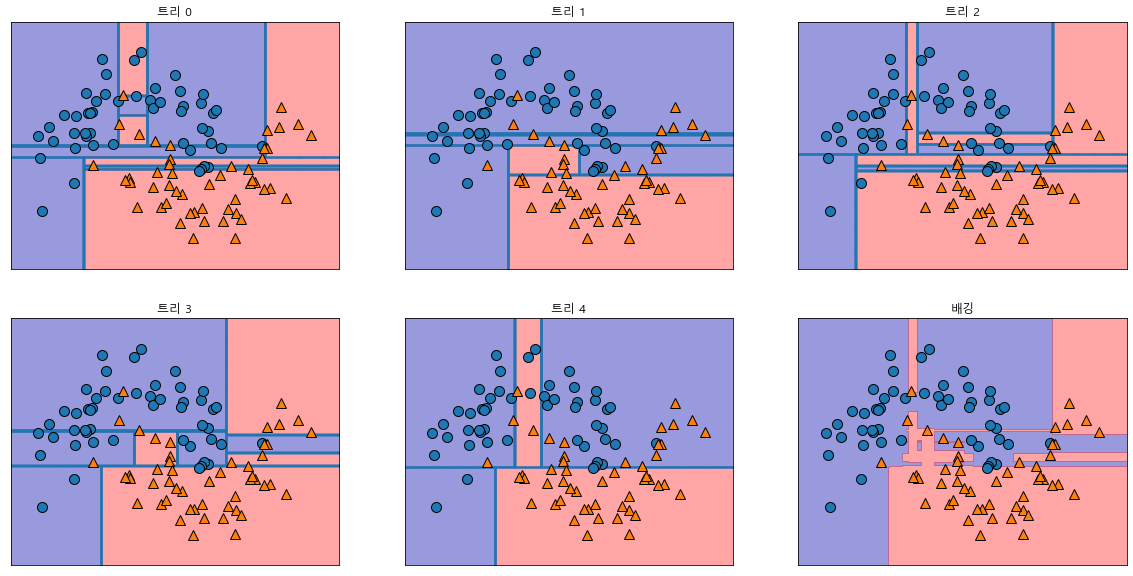

In [115]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("배깅")
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
plt.show()

In [116]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, oob_score=True, n_jobs =-1, random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [117]:
print('훈련 세트 정확도:{:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도:{:.3f}'.format(bagging.score(Xc_test,yc_test)))
print('OOB 샘플의 정확도:{:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.965
OOB 샘플의 정확도:0.951


### 엑스트라 트리

In [118]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators = 5, n_jobs=1, random_state =0)
xtree.fit(Xm_train, ym_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

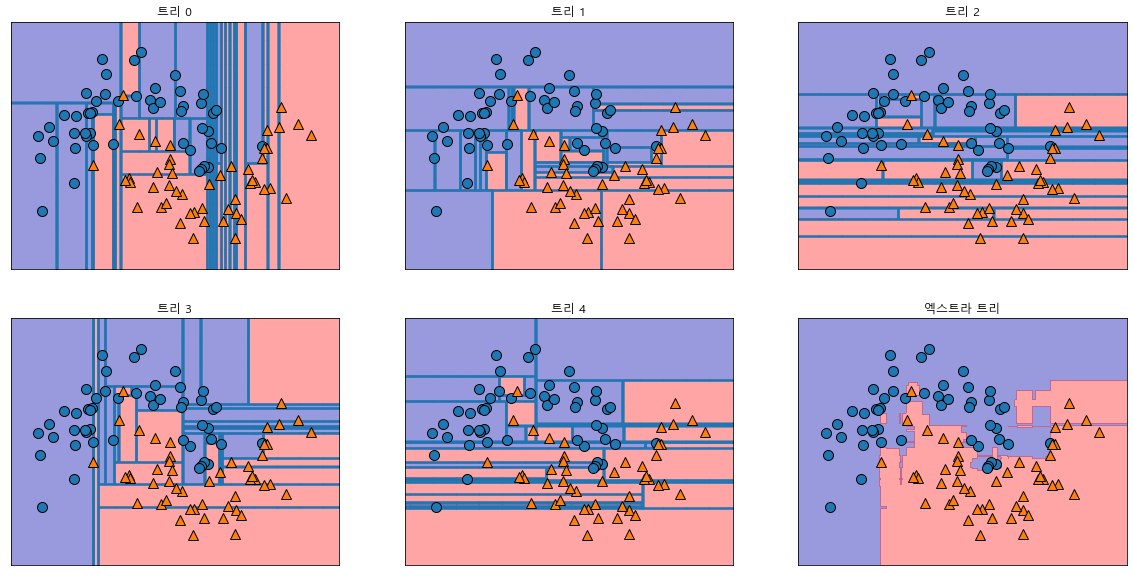

In [119]:
fig, axes = plt.subplots(2,3, figsize= (20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [120]:
xtree = ExtraTreesClassifier(n_estimators = 100, n_jobs =-1, random_state=0)
xtree.fit(Xc_train,yc_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [121]:
print('훈련 세트 정확도:{:.3f}'.format(xtree.score(Xc_train, yc_train)))
print('테스트 세트 정확도:{:.3f}'.format(xtree.score(Xc_test,yc_test)))

훈련 세트 정확도:1.000
테스트 세트 정확도:0.972


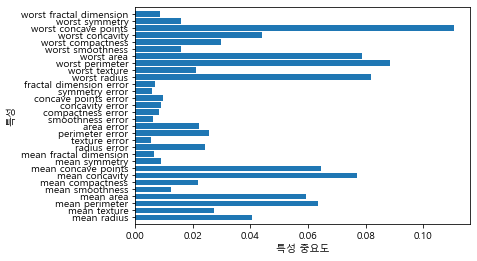

In [122]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features), xtree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
plt.show()

### 에이다 부스트

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [124]:
ada = AdaBoostClassifier(n_estimators=5, random_state = 42)
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

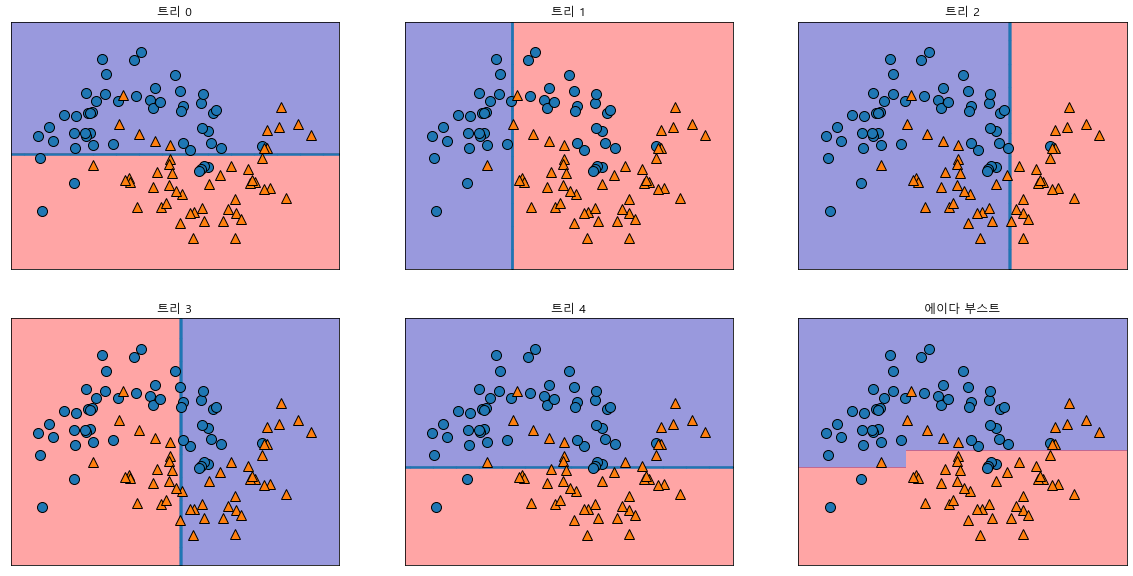

In [125]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('에이다 부스트')
mglearn.discrete_scatter(Xm[:,0], Xm[:,1], ym)
plt.show()

In [126]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(Xc_train, yc_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [127]:
print('훈련 세트 정확도: {:.3f}'.format(ada.score(Xc_train, yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(ada.score(Xc_test, yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


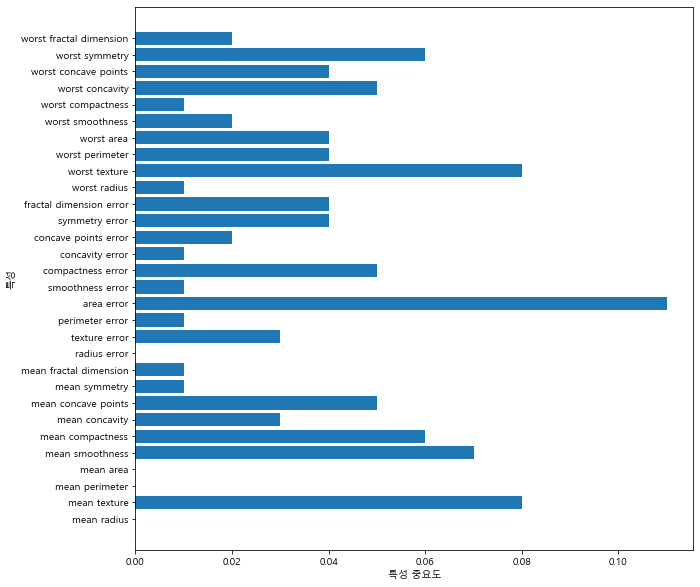

In [128]:
plt.figure(figsize= (10,10))
plt.barh(range(n_features), ada.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.show()